<a href="https://colab.research.google.com/github/Tattou20/Machine_Learning/blob/main/PCAdev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ursulla Navalona Arivola - n01586516
#Assignment 5

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')
import pandas as pd
import seaborn as sns

##Importation of the dataset in google collab using pandas

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
dr=pd.read_csv('gdrive/My Drive/titanic_train.csv')

In [ ]:
dr

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
type(dr)

pandas.core.frame.DataFrame

##Drop of the features “ Name, Ticket and Cabin”

In [ ]:
dr1 = dr.drop(columns=['Name','Ticket','Cabin'])
dr1

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


##Conversion of categorical features into integers so that machine can use them

In [ ]:
dr_dummies = pd.get_dummies(dr1[['Sex','Embarked']],prefix = '', prefix_sep ='')
dr_dummies

,female,male,C,Q,S
0,0,1,0,0,1
1,1,0,1,0,0
2,1,0,0,0,1
3,1,0,0,0,1
4,0,1,0,0,1
...,...,...,...,...,...
886,0,1,0,0,1
887,1,0,0,0,1
888,1,0,0,0,1
889,0,1,1,0,0


In [ ]:
dr2 = pd.concat([dr1,dr_dummies], axis = 1)
dr2

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,female,male,C,Q,S
0,1,0,3,male,22.0,1,0,7.2500,S,0,1,0,0,1
1,2,1,1,female,38.0,1,0,71.2833,C,1,0,1,0,0
2,3,1,3,female,26.0,0,0,7.9250,S,1,0,0,0,1
3,4,1,1,female,35.0,1,0,53.1000,S,1,0,0,0,1
4,5,0,3,male,35.0,0,0,8.0500,S,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S,0,1,0,0,1
887,888,1,1,female,19.0,0,0,30.0000,S,1,0,0,0,1
888,889,0,3,female,NaN,1,2,23.4500,S,1,0,0,0,1
889,890,1,1,male,26.0,0,0,30.0000,C,0,1,1,0,0


In [ ]:
dr2.drop(['Sex','Embarked'], axis = 1, inplace = True)

In [ ]:
dr2

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,0,1,0,0,1
887,888,1,1,19.0,0,0,30.0000,1,0,0,0,1
888,889,0,3,NaN,1,2,23.4500,1,0,0,0,1
889,890,1,1,26.0,0,0,30.0000,0,1,1,0,0


##Extracting all features of the dataset


In [ ]:
dr3 = dr2.dropna()

In [ ]:
dr3

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,39.0,0,5,29.1250,1,0,0,1,0
886,887,0,2,27.0,0,0,13.0000,0,1,0,0,1
887,888,1,1,19.0,0,0,30.0000,1,0,0,0,1
889,890,1,1,26.0,0,0,30.0000,0,1,1,0,0


In [ ]:
X_f = dr3.iloc[:,:-1]

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled_f = scaler.fit_transform(X_f)
X_scaled_f

array([[-1.72853202, -0.82702011,  0.91123237, ...,  0.75905134,
        -0.47180795, -0.20203051],
       [-1.7246701 ,  1.20916044, -1.47636364, ..., -1.31743394,
         2.11950647, -0.20203051],
       [-1.72080817,  1.20916044,  0.91123237, ..., -1.31743394,
        -0.47180795, -0.20203051],
       ...,
       [ 1.69699835,  1.20916044, -1.47636364, ..., -1.31743394,
        -0.47180795, -0.20203051],
       [ 1.70472221,  1.20916044, -1.47636364, ...,  0.75905134,
         2.11950647, -0.20203051],
       [ 1.70858414, -0.82702011,  0.91123237, ...,  0.75905134,
        -0.47180795,  4.94974747]])

##Applying PCA

###PCA 4 components

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 4)
X_pca = pca.fit_transform(X_scaled_f)
X_pca

array([[-1.67454453, -0.93935945,  0.41797774,  0.92927382],
       [ 2.88184511,  1.20479465,  0.1274415 ,  1.28601561],
       [ 1.21469195, -1.03365481, -1.83679549,  0.81086075],
       ...,
       [ 2.03071956,  0.37818591, -1.39314453, -1.37769612],
       [ 0.39464494,  2.11817773,  0.36020861, -1.61107414],
       [-2.02088871, -0.72659975, -1.2704228 ,  1.75306522]])

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

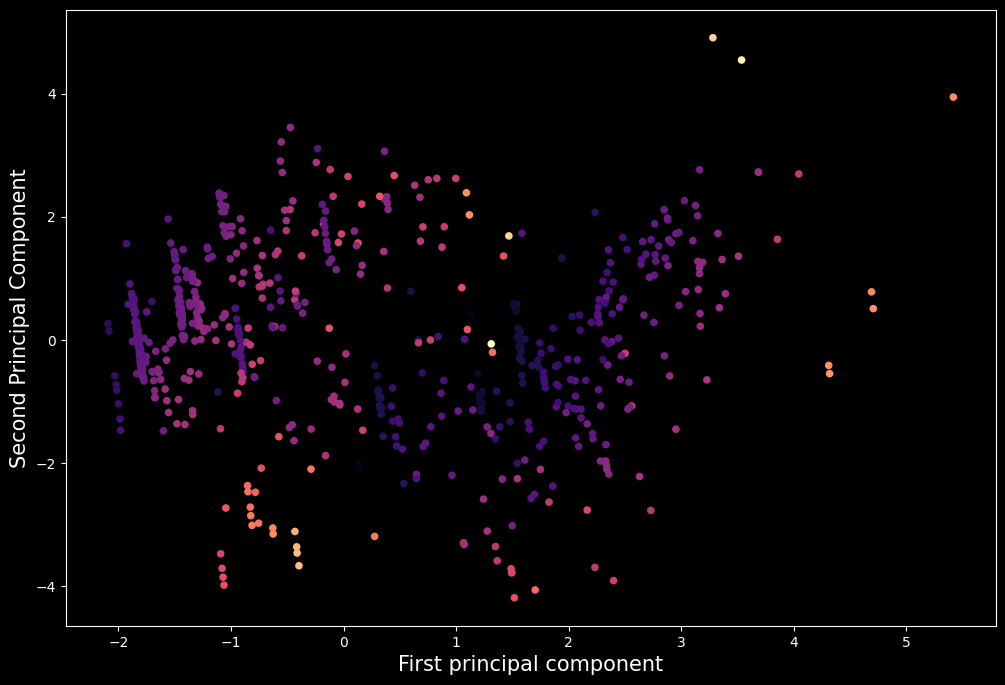

In [ ]:
plt.figure(figsize = (12,8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], s = 20,  c=X_pca[:, 2], cmap='magma')
plt.xlabel('First principal component', fontsize = 15)
plt.ylabel('Second Principal Component', fontsize = 15)
plt.show()

In [ ]:
print(pca.explained_variance_ratio_)

[0.25756563 0.17159139 0.12221533 0.09227371]


In [ ]:
print(np.sum(pca.explained_variance_ratio_))

0.6436460535409059


###PCA 3 components

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
X_pca = pca.fit_transform(X_scaled_f)
X_pca

array([[-1.67454453, -0.93935945,  0.41797774],
       [ 2.88184511,  1.20479465,  0.1274415 ],
       [ 1.21469195, -1.03365481, -1.83679549],
       ...,
       [ 2.03071956,  0.37818591, -1.39314453],
       [ 0.39464494,  2.11817773,  0.36020861],
       [-2.02088871, -0.72659975, -1.2704228 ]])

Text(0, 0.5, 'Second Principal Component')

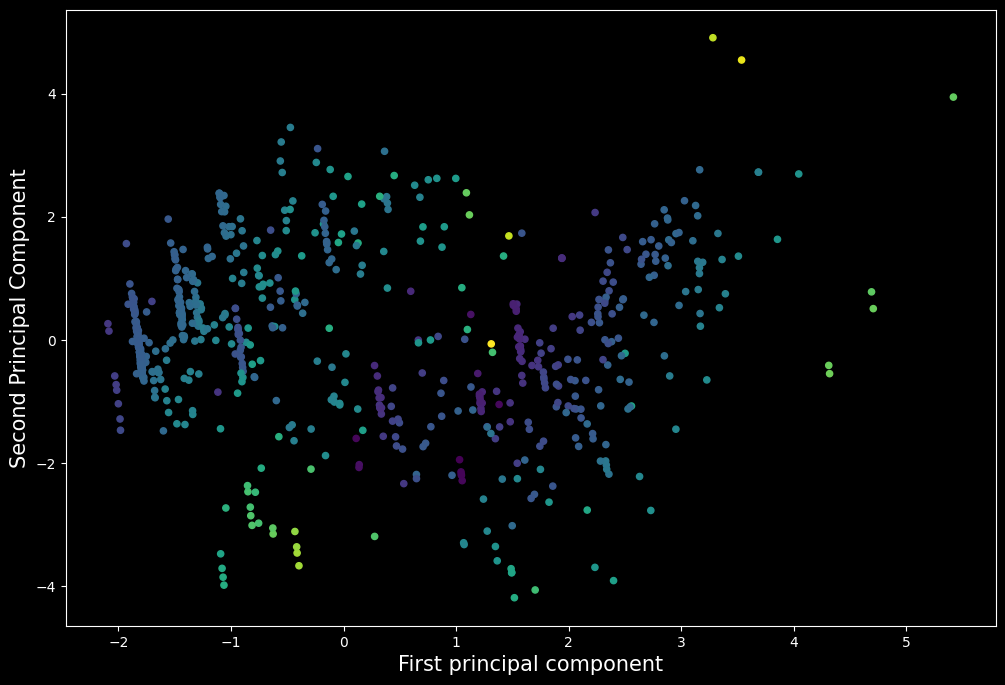

In [ ]:
plt.figure(figsize = (12,8))
plt.scatter(X_pca[:, 0], X_pca[:, 1],  s = 20, c=X_pca[:, 2])
plt.xlabel('First principal component', fontsize = 15)
plt.ylabel('Second Principal Component', fontsize = 15)

In [ ]:
print(pca.explained_variance_ratio_)

[0.25756563 0.17159139 0.12221533]


In [ ]:
print(np.sum(pca.explained_variance_ratio_))

0.5513723448154453


###PCA 2 components

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_scaled_f)
X_pca

array([[-1.67454453, -0.93935945],
       [ 2.88184511,  1.20479465],
       [ 1.21469195, -1.03365481],
       ...,
       [ 2.03071956,  0.37818591],
       [ 0.39464494,  2.11817773],
       [-2.02088871, -0.72659975]])

###Visualizing the Principal components

Text(0, 0.5, 'Second Principal Component')

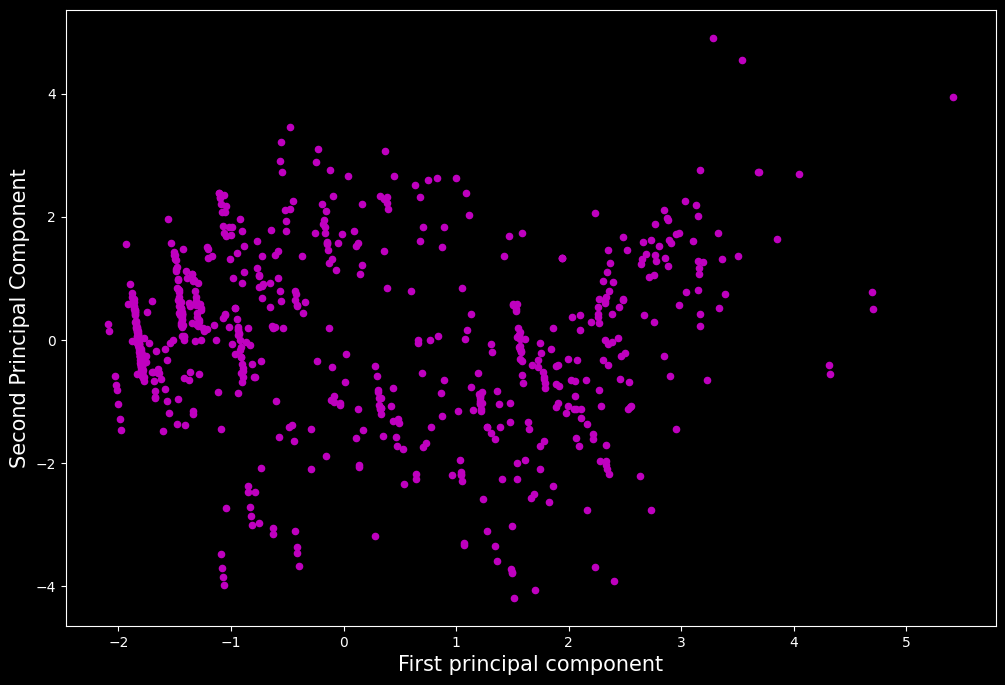

In [ ]:
plt.figure(figsize = (12,8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], s = 20, c='m')
plt.xlabel('First principal component', fontsize = 15)
plt.ylabel('Second Principal Component', fontsize = 15)

In [ ]:
print(pca.explained_variance_ratio_)

[0.25756563 0.17159139]


In [ ]:
print(np.sum(pca.explained_variance_ratio_))

0.429157013663844


##Perform of DBSCAN clustering using two principal components

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
dbscan =DBSCAN(eps= 0.40)
y_pred = dbscan.fit_predict(X_pca)

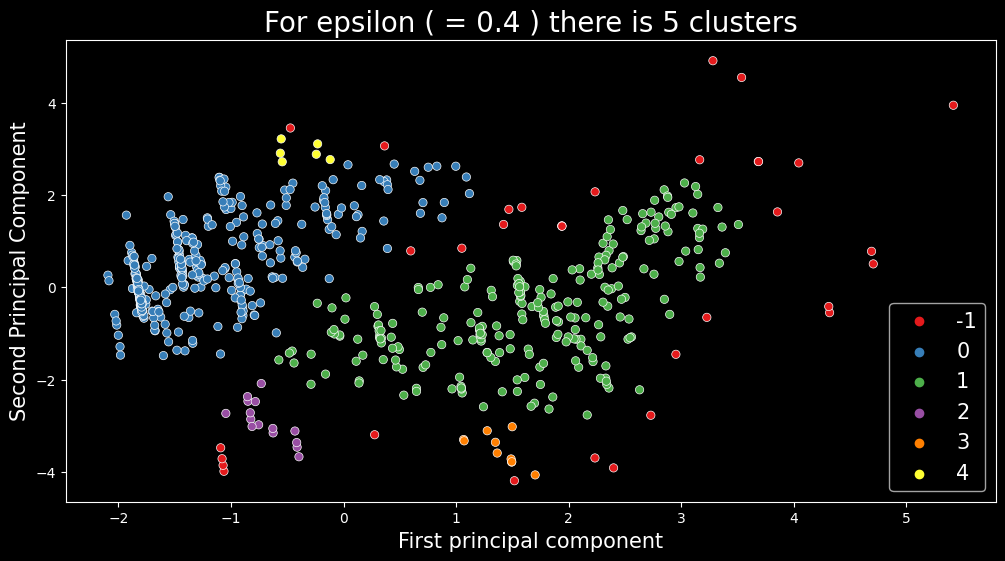

In [ ]:
plt.figure(figsize = (12,6))
sns.scatterplot(data=X_pca, x=X_pca[:, 0], y=X_pca[:, 1], hue=y_pred, palette='Set1')
plt.title('For epsilon ( = 0.4 ) there is 5 clusters', fontsize = 20)
plt.xlabel('First principal component', fontsize = 15)
plt.ylabel('Second Principal Component', fontsize = 15)
plt.legend(fontsize = 15)
plt.show()